In [50]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# print("Path to dataset files:", path)

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
import re
from collections import Counter

In [52]:
df= pd.read_csv('../data/IMDB Dataset.csv')
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Text(0.5, 1.0, 'Sentiment Distribution')

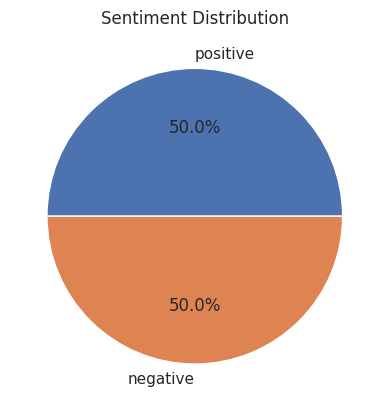

In [53]:
sns.set_theme(style= 'whitegrid')
sentiment_counts= df['sentiment'].value_counts()
sentiment_counts
plt.pie(sentiment_counts, labels=df['sentiment'].unique(), autopct= '%1.1f%%')
plt.title("Sentiment Distribution")

In [54]:
df.isna().value_counts()

review  sentiment
False   False        50000
dtype: int64

In [55]:
df.sample()

,review,sentiment
48717,Because that's all she does through out this w...,negative


In [56]:
# 1. Cleaning Text
html_pattern= r"<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
df['review'].replace(html_pattern, '', regex= True, inplace= True) # Removing HTML tags
punctuation_pattern= r'[^\w\s]'
df['review'].replace(punctuation_pattern, '', regex= True, inplace= True) # Removing Punctuation
special_chars_regex= r'[@_!#$%^&*()<>?/\|}{~:]'
df['review'].replace(special_chars_regex, '', regex= True, inplace= True) # Removing Special Characters 
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [57]:
df['string_length']= df['review'].map(lambda x: len(x))
df.head()

,review,sentiment,string_length
0,One of the other reviewers has mentioned that ...,positive,1665
1,A wonderful little production The filming tech...,positive,936
2,I thought this was a wonderful way to spend ti...,positive,874
3,Basically theres a family where a little boy J...,negative,688
4,Petter Matteis Love in the Time of Money is a ...,positive,1237


In [58]:
df['word_count']= df['review'].apply(lambda x: len(x.split()))
df['word_count'].max()

2450

In [59]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/vscode/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [60]:
# Remove Stop Words
nltk.download('stopwords')
stop_words= set(stopwords.words('english'))

def remove_stopwords(text):
    words= text.split()
    filtered_words= [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['review_no_stopwords']= df['review'].apply(lambda x: remove_stopwords(x))
df['review_no_stopwords']

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        One reviewers mentioned watching 1 Oz episode ...
1        A wonderful little production The filming tech...
2        I thought wonderful way spend time hot summer ...
3        Basically theres family little boy Jake thinks...
4        Petter Matteis Love Time Money visually stunni...
                               ...                        
49995    I thought movie right good job It wasnt creati...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I Catholic taught parochial elementary schools...
49998    Im going disagree previous comment side Maltin...
49999    No one expects Star Trek movies high art fans ...
Name: review_no_stopwords, Length: 50000, dtype: object

In [61]:
# 2. Tokenize Reviews
df['tokenized_review']= df['review_no_stopwords'].apply(word_tokenize)
df['tokenized_review'][0]

['One',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'Oz',
 'episode',
 'youll',
 'hooked',
 'They',
 'right',
 'exactly',
 'happened',
 'meThe',
 'first',
 'thing',
 'struck',
 'Oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'GO',
 'Trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'This',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'Its',
 'hardcore',
 'classic',
 'use',
 'wordIt',
 'called',
 'OZ',
 'nickname',
 'given',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'It',
 'focuses',
 'mainly',
 'Emerald',
 'City',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'Em',
 'City',
 'home',
 'manyAryans',
 'Muslims',
 'gangstas',
 'Latinos',
 'Christians',
 'Italians',
 'Irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayI',
 'would',
 'say',
 'main'

In [48]:
# Lemmatization
nltk.download('wordnet')
nltk.download('averaged_perceptron_trigger')
nltk.download('averaged_perceptron_tagger_eng')

def get_wordnet_pos(tag):
    tag= tag[0].upper()
    tag_dict= {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
def lemmatize_text(text):
    lemmatizer= WordNetLemmatizer()
    tagged_words= nltk.pos_tag(text)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_words]

df['lemmatized_tokens']= df['tokenized_review'].apply(lemmatize_text)
df['lemmatized_tokens'].head(5)

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading averaged_perceptron_trigger: Package
[nltk_data]     'averaged_perceptron_trigger' not found in index
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/vscode/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


0    [One, reviewer, mention, watch, 1, Oz, episode...
1    [A, wonderful, little, production, The, filmin...
2    [I, think, wonderful, way, spend, time, hot, s...
3    [Basically, there, family, little, boy, Jake, ...
4    [Petter, Matteis, Love, Time, Money, visually,...
Name: lemmatized_tokens, dtype: object

In [49]:
# 3. Flatten the list of lists into a list of all tokens
tokenized_reviews_train= df['lemmatized_tokens']
tokenized_reviews_train[0]

# all_tokens= [token for review_tokens in tokenized_reviews_train for token in review_tokens]
# all_tokens

['One',
 'reviewer',
 'mention',
 'watch',
 '1',
 'Oz',
 'episode',
 'youll',
 'hook',
 'They',
 'right',
 'exactly',
 'happen',
 'meThe',
 'first',
 'thing',
 'strike',
 'Oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'GO',
 'Trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'This',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'Its',
 'hardcore',
 'classic',
 'use',
 'wordIt',
 'call',
 'OZ',
 'nickname',
 'give',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'It',
 'focus',
 'mainly',
 'Emerald',
 'City',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'Em',
 'City',
 'home',
 'manyAryans',
 'Muslims',
 'gangsta',
 'Latinos',
 'Christians',
 'Italians',
 'Irish',
 'moreso',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'awayI',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due'

In [48]:
# 4. Calculate Token Frequency
token_counts= Counter(all_tokens)
len(token_counts)

256479

In [49]:
# 5. Define special tokens and their indeces
PAD_TOKEN= '<PAD>'
UNK_TOKEN= '<UNK>'

START_INDEX= 2

special_tokens= [PAD_TOKEN, UNK_TOKEN]

token_to_idx= {token: i for i, token in enumerate(special_tokens)}
idx_to_token= {i: token for i, token in enumerate(special_tokens)}

token_to_idx, idx_to_token

({'<PAD>': 0, '<UNK>': 1}, {0: '<PAD>', 1: '<UNK>'})

In [50]:
# 6. Build the Vocabulary

# Set a minimum frequency
min_freq= 5

# Get Tokens sorted by freq and filter based on min freq
valid_tokens= [token for token, count in token_counts.most_common() if count >= min_freq and token not in special_tokens]

valid_tokens


['I',
 'movie',
 'The',
 'film',
 'one',
 'like',
 'good',
 'This',
 'would',
 'time',
 'really',
 'It',
 'see',
 'even',
 'story',
 'much',
 'get',
 'bad',
 'people',
 'great',
 'well',
 'first',
 'made',
 'also',
 'movies',
 'make',
 'films',
 'could',
 'way',
 'dont',
 'characters',
 'think',
 'seen',
 'character',
 'But',
 'watch',
 'many',
 'know',
 'acting',
 'never',
 'plot',
 'two',
 'And',
 'Its',
 'little',
 'love',
 'show',
 'best',
 'ever',
 'life',
 'better',
 'A',
 'say',
 'scene',
 'end',
 'scenes',
 'In',
 'still',
 'something',
 'If',
 'He',
 'go',
 'back',
 'doesnt',
 'didnt',
 'actors',
 'real',
 'thing',
 'Im',
 'man',
 'watching',
 'years',
 'There',
 'makes',
 'find',
 'funny',
 'work',
 'actually',
 'going',
 'lot',
 'look',
 'though',
 'old',
 'cant',
 'part',
 'another',
 'nothing',
 'want',
 'cast',
 'quite',
 'got',
 'every',
 'seems',
 'around',
 'pretty',
 'things',
 'fact',
 'enough',
 'thought',
 'director',
 'take',
 'give',
 'young',
 'us',
 'gets',
 'i

In [51]:
# 7. Assign indices to valid tokens (i.e Building the vocab)
for i, token in enumerate(valid_tokens):
    token_to_idx[token]= i + START_INDEX
    idx_to_token[i + START_INDEX]= token
vocab_size= len(token_to_idx)
len(token_to_idx), len(idx_to_token)
# token_to_idx

(50936, 50936)

In [52]:
# Example using the vocab
example_review= df['tokenized_review'][0]
example_indices= [
    token_to_idx.get(token, token_to_idx[UNK_TOKEN])
    for token in example_review
]
example_indices

[220,
 1864,
 965,
 72,
 406,
 4017,
 309,
 428,
 3126,
 132,
 118,
 516,
 500,
 8968,
 23,
 69,
 3215,
 4017,
 5712,
 16534,
 57,
 506,
 200,
 118,
 581,
 8716,
 6294,
 48,
 8717,
 5893,
 12375,
 9,
 48,
 2425,
 6147,
 6113,
 1386,
 304,
 506,
 45,
 3525,
 266,
 240,
 1,
 372,
 13620,
 12054,
 257,
 17287,
 26194,
 14325,
 4300,
 1,
 13,
 2555,
 1322,
 35659,
 1119,
 4926,
 2474,
 1178,
 7531,
 3476,
 13621,
 321,
 1,
 18547,
 258,
 5315,
 21194,
 1119,
 268,
 1,
 9159,
 45537,
 16897,
 5500,
 8486,
 2434,
 21195,
 1,
 281,
 9768,
 7851,
 14083,
 9058,
 38344,
 41,
 141,
 25165,
 10,
 54,
 175,
 1190,
 48,
 594,
 98,
 168,
 163,
 471,
 3216,
 4840,
 96,
 1415,
 4449,
 2435,
 1017,
 812,
 1336,
 812,
 1,
 65,
 875,
 95,
 4,
 23,
 309,
 2,
 50,
 112,
 3215,
 1514,
 2128,
 2,
 299,
 54,
 2,
 1462,
 2,
 183,
 2,
 1354,
 1171,
 4017,
 92,
 10797,
 258,
 1990,
 2051,
 506,
 231,
 506,
 8260,
 7922,
 5259,
 15184,
 2902,
 35660,
 7189,
 15184,
 446,
 543,
 18,
 153,
 22,
 10254,
 701,
 739,


In [4]:
df= pd.read_csv('../data/Processed-Dataset.csv')
df.head(5)

,Unnamed: 0,review,sentiment,tokenized_reviews,lemmatized_tokens
0,0,One reviewers mentioned watching 1 Oz episode ...,positive,"['One', 'reviewers', 'mentioned', 'watching', ...","['One', 'reviewer', 'mention', 'watch', '1', '..."
1,1,A wonderful little production The filming tech...,positive,"['A', 'wonderful', 'little', 'production', 'Th...","['A', 'wonderful', 'little', 'production', 'Th..."
2,2,I thought wonderful way spend time hot summer ...,positive,"['I', 'thought', 'wonderful', 'way', 'spend', ...","['I', 'think', 'wonderful', 'way', 'spend', 't..."
3,3,Basically theres family little boy Jake thinks...,negative,"['Basically', 'theres', 'family', 'little', 'b...","['Basically', 'there', 'family', 'little', 'bo..."
4,4,Petter Matteis Love Time Money visually stunni...,positive,"['Petter', 'Matteis', 'Love', 'Time', 'Money',...","['Petter', 'Matteis', 'Love', 'Time', 'Money',..."


In [1]:
vocab= build_vocab(train_df, 'lemmatized_tokens')
vocab

NameError: name 'build_vocab' is not defined